# World Data League 2021
## Stage 1
### Challenge 2: Model of integrated transports for senior citizens

#### Team: I Bellissimi di Rete 4 (Arcudi Alessio, Padella Alessandro, Pozzan Matteo, Vinci Francesco)

## Introduction

Public transport is a fundamental part of every city, for the metropolitan area its operativity status and efficiency are 
fundamental for a well-organized area and to reduce the environmental impact of people who lived in it, for the people 
who live in the suburbs it's one of the most used mean to reach the city center.


For a mean of transport network, it's so important to remain both functional and updated, this work aims to provide some insights 
on the public bus network of Portugal, based on the usage data belonging to the elderly people; starting from this we
propose some ideas to improve it.


In the first part we provide an analysis of the features of the dataset, then, after some consideration, we focus only
on Lisbon area providing insights on the elderly people displacements and inferring some feasible and affordable ideas to improve them.


We built a model that describes how the elders travel by bus inside the district of Lisbon, by doing so we also identified what are currently the most relevant counties and links between counties. <br> Given this current overview, it is possible to improve the elderly viability/mobility.
For instance, starting from the data of how old people move with any means of transport within the district, and from the graph representing the district, we have constructed a distribution that describes which county and connections are more important, according to the centrality of the nodes, number of elderly and population density of the county. This distribution allows, if public transport can be upgraded, to invest money and resources in focal points. In fact, by comparing this distribution with the current distribution of buses, we were able to identify sections much used by the elderly, but that are underserved by public transports.

## Development

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
bus_routes = pd.read_csv('BusRoutes.csv', sep = '|')
TIM = pd.read_csv('Senior_TIM_v1.csv', sep = '|', encoding= 'unicode_escape')
print(bus_routes.head)
print(TIM.head())

<bound method NDFrame.head of        IDRoute      linkid
0            1   537277300
1            1   537277673
2            1   537277754
3            1   537277777
4            1   537277795
...        ...         ...
48307      166  1226896489
48308      166  1226896507
48309      166  1226896508
48310      166  1226896568
48311      166  1226896569

[48312 rows x 2 columns]>
     linkid Region_of_Origin District_of_Origin     County_of_Origin  \
0  80216810   R1 - AM Lisboa             Lisboa               Lisboa   
1  80216810   R1 - AM Lisboa            Setúbal              Palmela   
2  80216810   R1 - AM Lisboa             Lisboa               Oeiras   
3  80216810   R1 - AM Lisboa             Lisboa  Vila Franca de Xira   
4  80216812   R1 - AM Lisboa             Lisboa               Lisboa   

   Average_Daily_SeniorPopulation_Travelling  
0                                2013.681187  
1                                7688.296396  
2                                 220.647248 

In [3]:
print(f"Regions: {TIM['Region_of_Origin'].unique()} \n\nDisctricts: {TIM['District_of_Origin'].unique()} \n\nCounties: {TIM['County_of_Origin'].unique()}")

Regions: ['R1 - AM Lisboa' 'R2 - AM Porto'] 

Disctricts: ['Lisboa' 'Setúbal' 'Porto' 'Aveiro'] 

Counties: ['Lisboa' 'Palmela' 'Oeiras' 'Vila Franca de Xira' 'Sintra' 'Barreiro'
 'Seixal' 'Almada' 'Amadora' 'Mafra' 'Odivelas' 'Sesimbra' 'Maia' 'Loures'
 'Porto' 'Gondomar' 'Setúbal' 'Cascais' 'Montijo' 'Santa Maria da Feira'
 'Matosinhos' 'Moita' 'Alcochete']


In [4]:
print(f"Numer of bus_routes: {len(bus_routes['IDRoute'].unique())}")

Numer of bus_routes: 166


In [5]:
# number of common road segments between IDRoute i and IDRoute j

def n_common_linkId(i,j):
    if i == j:
        """
        to shrink the 'range colour' on the heatmap
        """
        return 0
    return len(set(bus_routes[bus_routes['IDRoute'] == i]['linkid']) & set(bus_routes[bus_routes['IDRoute']==j]['linkid']))

Building a heat map from a similarity matrix using n_common_linkId as metric

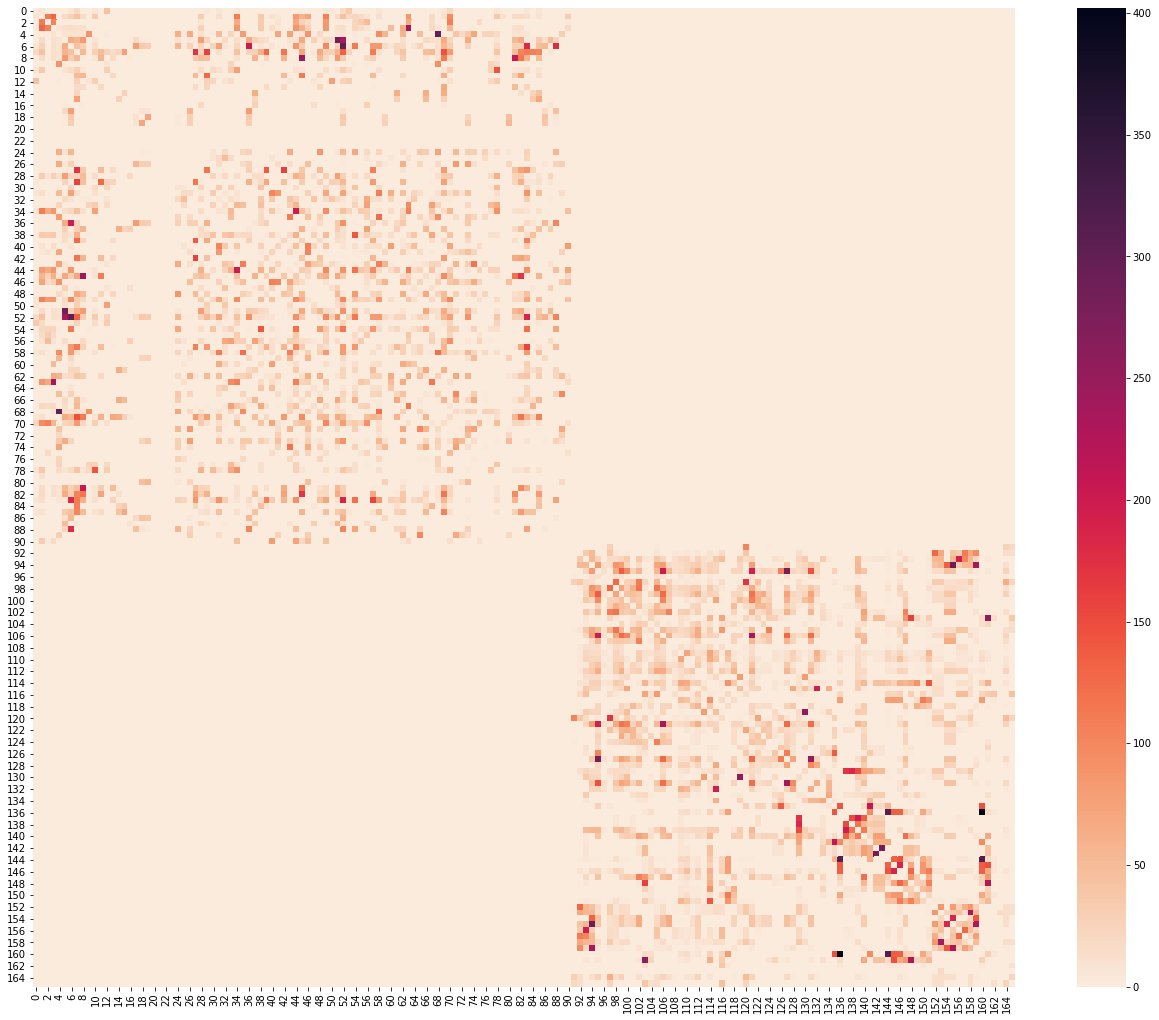

In [6]:
n = len(bus_routes['IDRoute'].unique())
bus_matr = np.zeros(shape=(n, n))

for i in range(n):
    for j in range(n):
        bus_matr[i, j] = n_common_linkId(i+1, j+1)
        
plt.figure(figsize=(22,18))
ax = sns.heatmap(bus_matr, cmap = "rocket_r")
plt.show()

Same with using as metrics the 'Jaccard Similarity' for normalizing the values:

In [7]:
# jaccard similarity

def jacc(i,j):
    return len(set(bus_routes[bus_routes['IDRoute'] == i]['linkid']) & set(bus_routes[bus_routes['IDRoute']==j]['linkid']))/len(set(bus_routes[bus_routes['IDRoute'] == i]['linkid']) | set(bus_routes[bus_routes['IDRoute']==j]['linkid']))

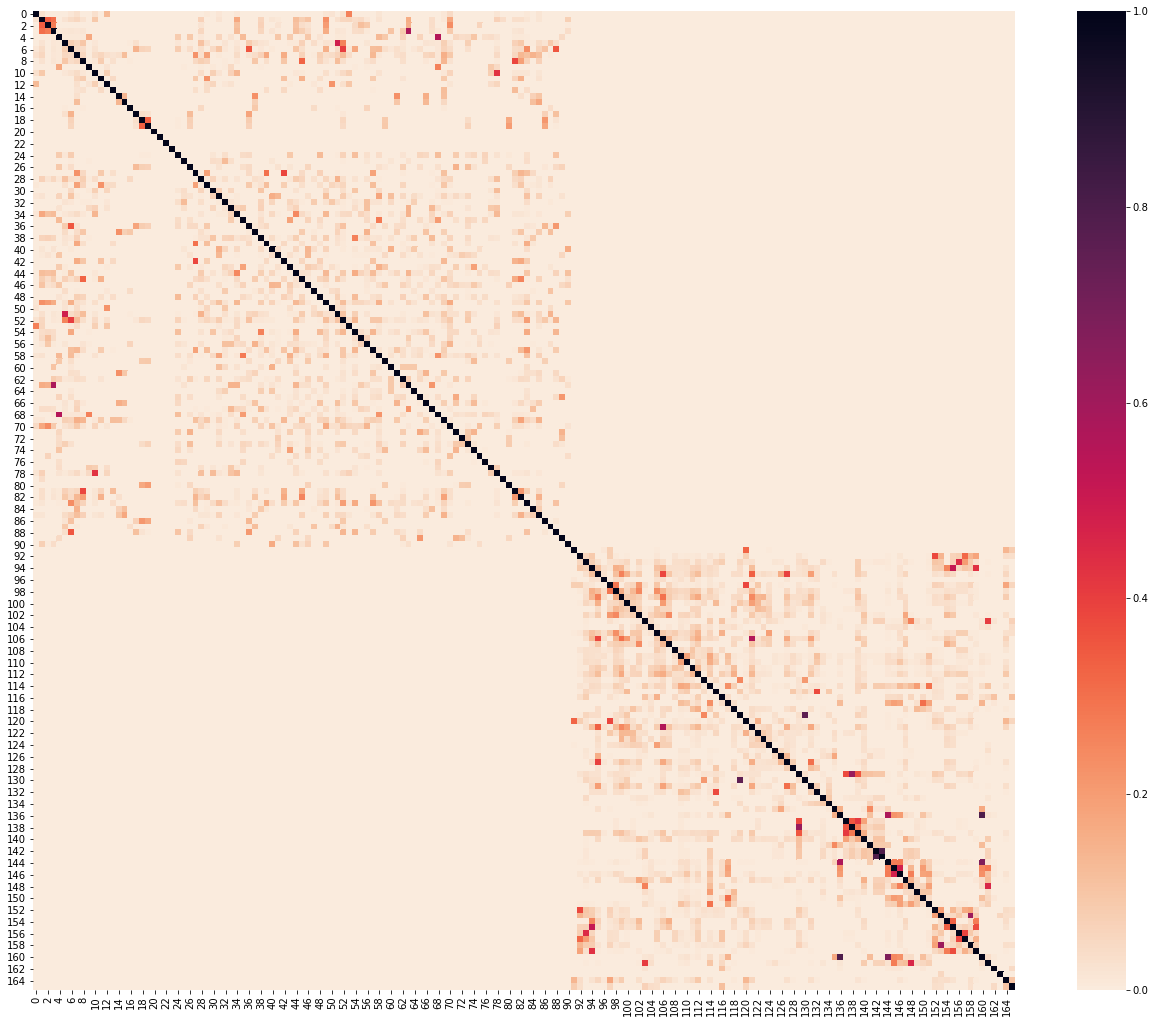

In [8]:
n = len(bus_routes['IDRoute'].unique())
bus_matr_ = np.zeros(shape=(n, n))

for i in range(n):
    for j in range(n):
        bus_matr_[i, j] = jacc(i+1, j+1)
        
plt.figure(figsize=(22,18))
ax = sns.heatmap(bus_matr_, cmap = "rocket_r")
plt.show()

In [9]:
# Are there some values greater than 0 in the "empty space"?

print(set(list(bus_matr_[:91,91:].flatten())))

{0.0}


We can see there are two 'clusters'.
We can suppose they refer to the two Regions.

Let's prove it:

In [10]:
TIM_bus = bus_routes.merge(TIM) # Merge the two data sets

print(TIM_bus)

       IDRoute      linkid Region_of_Origin District_of_Origin  \
0            1   537277754   R1 - AM Lisboa             Lisboa   
1            1   537277754   R1 - AM Lisboa             Lisboa   
2            1   537277795   R1 - AM Lisboa             Lisboa   
3            1   537277795   R1 - AM Lisboa             Lisboa   
4            1   537277954   R1 - AM Lisboa             Lisboa   
...        ...         ...              ...                ...   
60176      165   835530689   R1 - AM Lisboa             Lisboa   
60177      165  1171783065    R2 - AM Porto              Porto   
60178      165  1171783066    R2 - AM Porto              Porto   
60179      165  1221311422   R1 - AM Lisboa             Lisboa   
60180      165  1221311423   R1 - AM Lisboa             Lisboa   

      County_of_Origin  Average_Daily_SeniorPopulation_Travelling  
0             Odivelas                                 475.150424  
1               Oeiras                                 224.733308  
2  

In [11]:
TIM_bus[TIM_bus['IDRoute'] <=91]   # Lisboa's bus (?)

,IDRoute,linkid,Region_of_Origin,District_of_Origin,County_of_Origin,Average_Daily_SeniorPopulation_Travelling
0,1,537277754,R1 - AM Lisboa,Lisboa,Odivelas,475.150424
1,1,537277754,R1 - AM Lisboa,Lisboa,Oeiras,224.733308
2,1,537277795,R1 - AM Lisboa,Lisboa,Oeiras,224.733308
3,1,537277795,R1 - AM Lisboa,Lisboa,Odivelas,4472.173594
4,1,537277954,R1 - AM Lisboa,Lisboa,Lisboa,664.568498
...,...,...,...,...,...,...
43687,91,1201872380,R1 - AM Lisboa,Lisboa,Amadora,105.070118
43688,91,1202116323,R1 - AM Lisboa,Lisboa,Mafra,272.890446
43689,91,1202116324,R1 - AM Lisboa,Lisboa,Sintra,96.314275
43690,91,1202116324,R1 - AM Lisboa,Lisboa,Mafra,272.890446


In [12]:
total = TIM_bus['Average_Daily_SeniorPopulation_Travelling'].sum() # n tot seniors travelling in bus
print(f"Rate of senior people in Porto region traveling on Lisbon buses compared to total: {TIM_bus[(TIM_bus['IDRoute'] <= 91) & (TIM_bus['Region_of_Origin'] == 'R2 - AM Porto')]['Average_Daily_SeniorPopulation_Travelling'].sum()/total}")
print(f"Rate of senior people in Porto region traveling on Lisbon buses compared to the total number of people traveling on Lisbon buses: {TIM_bus[(TIM_bus['IDRoute'] <= 90) & (TIM_bus['Region_of_Origin'] == 'R2 - AM Porto')]['Average_Daily_SeniorPopulation_Travelling'].sum()/TIM_bus[(TIM_bus['IDRoute'] <= 90)]['Average_Daily_SeniorPopulation_Travelling'].sum()}")
print("\n")
print(f"Rate of senior people in Lisbon region traveling on Porto buses compared to total: {TIM_bus[(TIM_bus['IDRoute'] > 90) & (TIM_bus['Region_of_Origin'] == 'R1 - AM Lisboa')]['Average_Daily_SeniorPopulation_Travelling'].sum()/total}")
print(f"Rate of senior people in Porto region traveling on Lisbon buses compared to the total number of people traveling on Lisbon buses: {TIM_bus[(TIM_bus['IDRoute'] > 90) & (TIM_bus['Region_of_Origin'] == 'R1 - AM Lisboa')]['Average_Daily_SeniorPopulation_Travelling'].sum()/TIM_bus[(TIM_bus['IDRoute'] > 90)]['Average_Daily_SeniorPopulation_Travelling'].sum()}")

Rate of senior people in Porto region traveling on Lisbon buses compared to total: 0.007006592956997711
Rate of senior people in Porto region traveling on Lisbon buses compared to the total number of people traveling on Lisbon buses: 0.016498847747995784


Rate of senior people in Lisbon region traveling on Porto buses compared to total: 0.007006672012890224
Rate of senior people in Porto region traveling on Lisbon buses compared to the total number of people traveling on Lisbon buses: 0.012178562133672334


In [13]:
print(f"Porto's counties: {TIM[TIM['Region_of_Origin'] == 'R2 - AM Porto']['County_of_Origin'].unique()}")

Porto's counties: ['Maia' 'Porto' 'Gondomar' 'Santa Maria da Feira' 'Matosinhos']


In [14]:
print(f"Lisbon's counties: {TIM[TIM['Region_of_Origin'] == 'R1 - AM Lisboa']['County_of_Origin'].unique()}")

Lisbon's counties: ['Lisboa' 'Palmela' 'Oeiras' 'Vila Franca de Xira' 'Sintra' 'Barreiro'
 'Seixal' 'Almada' 'Amadora' 'Mafra' 'Odivelas' 'Sesimbra' 'Loures'
 'Setúbal' 'Cascais' 'Montijo' 'Moita' 'Alcochete']


In [15]:
# split TIM_bus in two datasets (Porto e Lisboa) (and remove 'outliers' (Lisbon's seniors travelling in Porto and Porto's seniors travelling in Lisbon))

TIM_lisboa = TIM_bus[(TIM_bus['IDRoute']<=91) & (TIM_bus['Region_of_Origin']=='R1 - AM Lisboa')]
TIM_porto = TIM_bus[(TIM_bus['IDRoute']>91) & (TIM_bus['Region_of_Origin']=='R2 - AM Porto')]

### We focused only on Lisbon's mobility

###### Building the adjacency matrix for geographical proximity of the counties

In [16]:
# '*COUNTY_NAME*':{***LIST OF BORDERING COUNTIES***}

LISB_COUNTY={'Cascais':['Cascais','Oeiras','Sintra'],
  'Oeiras':['Oeiras','Cascais','Sintra','Amadora','Lisboa'],
  'Lisboa':['Lisboa','Oeiras','Amadora','Odivelas','Loures','Almada','Alcochete'],
  'Amadora':['Amadora','Oeiras','Lisboa','Odivelas','Sintra'],
  'Sintra':['Sintra','Cascais','Mafra','Oeiras','Amadora','Odivelas','Loures'],
  'Odivelas':['Odivelas','Lisboa','Amadora','Sintra','Loures'],
  'Loures':['Loures','Lisboa','Vila Franca de Xira','Mafra','Sintra','Odivelas'],
  'Mafra':['Mafra','Sintra','Loures'],
  'Vila Franca de Xira':['Vila Franca de Xira','Loures'],
  'Almada':['Almada','Seixal','Sesimbra','Lisboa'],
  'Seixal':['Seixal','Almada','Sesimbra','Barreiro'],
  'Barreiro':['Barreiro','Seixal','Sesimbra','Setúbal','Palmela','Moita'],
  'Sesimbra':['Sesimbra','Seixal','Almada','Setúbal','Barreiro'],
  'Setúbal':['Setúbal','Palmela','Barreiro','Sesimbra'],
  'Moita':['Moita','Barreiro','Palmela','Montijo'],
  'Palmela':['Palmela','Montijo','Alcochete','Moita','Barreiro','Setúbal'],
  'Alcochete':['Alcochete','Palmela','Montijo','Lisboa'],
  'Montijo':['Montijo','Alcochete','Palmela','Moita']}


In [17]:
from sklearn.feature_extraction import DictVectorizer


restructured = []
for key in sorted(LISB_COUNTY.keys()):
    data_dict = {}
    for i in sorted(LISB_COUNTY.keys()):
        data_dict[i] = 0
    for i in LISB_COUNTY[key]:
        data_dict[i] = 1
    restructured.append(data_dict)
    
    
dictvectorizer = DictVectorizer(sparse=False)
features = dictvectorizer.fit_transform(restructured)

In [18]:
df=pd.DataFrame(features,columns=sorted(LISB_COUNTY.keys()),index=sorted(LISB_COUNTY.keys()))

In [19]:
df

,Alcochete,Almada,Amadora,Barreiro,Cascais,Lisboa,Loures,Mafra,Moita,Montijo,Odivelas,Oeiras,Palmela,Seixal,Sesimbra,Setúbal,Sintra,Vila Franca de Xira
Alcochete,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Almada,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
Amadora,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Barreiro,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0
Cascais,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
Lisboa,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Loures,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
Mafra,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Moita,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Montijo,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [20]:
import networkx as nx
''' Build the graph '''

' Build the graph '

In [21]:
df_edges=df.stack().reset_index()
df_edges=df_edges[df_edges[0]==1]
df_edges.index=range(len(df_edges))
df_edges.columns=['Source','Target','Weight']
#df_edges.to_csv('edge_list.csv',index=False) # usefull for Gephi

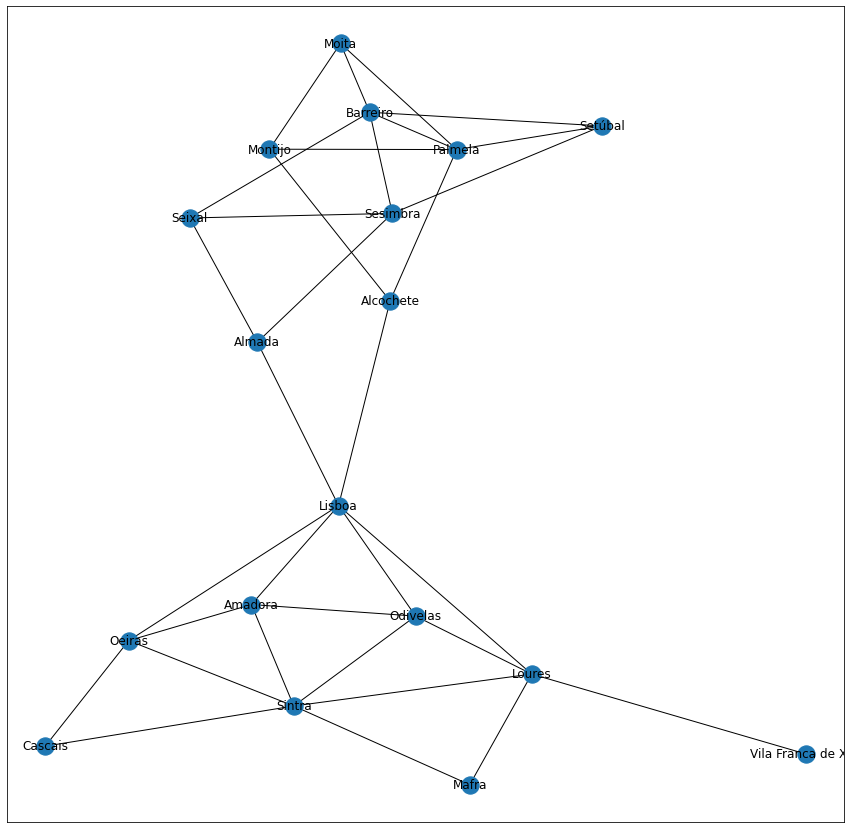

In [22]:
G=nx.from_pandas_edgelist(df_edges, 'Source', 'Target', ['Weight'])
plt.figure(figsize=(15,15))
nx.spring_layout(G)
nx.draw_networkx(G)
plt.show()

In [23]:
geo_graph = G.copy()

#### Building a graph which describes the bus mobility for the senior population 

Example of procedure used for the construction of the graph and the calculation of its weights, using only IDRoute 1.

It will subsequently be iterated to all lines including belonging to the Lisbon area

In [24]:
#Filter the data only related to Bus 1
X=TIM_bus[(TIM_bus['IDRoute'] == 1)][['County_of_Origin','Average_Daily_SeniorPopulation_Travelling']].groupby(by=['County_of_Origin']).sum()
print(X.index)

Index(['Amadora', 'Barreiro', 'Lisboa', 'Odivelas', 'Oeiras', 'Seixal',
       'Sintra', 'Vila Franca de Xira'],
      dtype='object', name='County_of_Origin')


In [25]:
#Make the County related to line 1 connected
#Get the adjacency matrix and the density vector (in a pandas series)
def make_connect(df_1,X):
    l=list(X.index)
    k=[]
    if ('Lisboa' in l):
        if ('Barreiro' in l) and ('Almada' not in l):
            X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Almada'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
            k.append('Almada')
        if ('Barreiro' in l) and ('Almada' in l) and ('Seixal' not in l) and ('Sesimbra' not in l):
            X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Seixal'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
            k.append('Seixal')
        if ('Setùbal' in l) and ('Barreiro' not in l):
            if ('Almada' in l):
                if ('Sesimbra' not in l):
                    X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Sesimbra'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
                    k.append('Sesimbra')
            else:
                X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Almada'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
                k.append('Almada')
                if ('Sesimbra' not in l):
                    X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Sesimbra'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
                    k.append('Sesimbra')
        if ('Sesimbra' in l) and ('Barreiro' not in l) and ('Setùbal' not in l) and ('Almada' not in l):
            X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Almada'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
            k.append('Almada')        
        if ('Seixal' in l) and ('Barreiro' not in l) and ('Setùbal' not in l) and ('Almada' not in l):
            X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Almada'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
            k.append('Almada')
        if ('Palmela' in l) and ('Alcochete' not in l):
            X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Alcochete'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
            k.append('Alcochete')            
        elif ('Montijo' in l) and ('Alcochete' not in l):
            X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Alcochete'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
            k.append('Alcochete') 
        if ('Moita' in l) and ('Palmela' not in l) and ('Montijo' not in l):
            X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Palmela'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
            k.append('Palmela')
            if ('Alcochete' not in l):
                X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Alcochete'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
                k.append('Alcochete')                     
        if ('Vila Franca de Xira' in l) and ('Loures' not in l): 
            X=pd.concat([X,pd.DataFrame(np.ones((1,1)),index=['Loures'],columns=['Average_Daily_SeniorPopulation_Travelling'])])
            k.append('Loures')   
    return k,X

In [26]:
df_1=df.copy()

k,X=make_connect(df_1,X)
print(X)

                     Average_Daily_SeniorPopulation_Travelling
Amadora                                             733.470251
Barreiro                                          15937.657293
Lisboa                                            19305.587134
Odivelas                                          46541.787086
Oeiras                                             6132.008833
Seixal                                              349.804611
Sintra                                              961.004357
Vila Franca de Xira                                 257.750766
Almada                                                1.000000
Loures                                                1.000000


In [27]:
#Filter on the county not selected, and add a zero in the not considered counties 
#Normalize on the sum of the columns
D=set(df.index).difference(set(X.index))
df_1.loc[list(D)]=np.zeros((len(D),18))
df_1[list(D)]=np.zeros((18,len(D)))
df_1=df_1/df_1.sum()
df_1=df_1.fillna(0)
df_1

,Alcochete,Almada,Amadora,Barreiro,Cascais,Lisboa,Loures,Mafra,Moita,Montijo,Odivelas,Oeiras,Palmela,Seixal,Sesimbra,Setúbal,Sintra,Vila Franca de Xira
Alcochete,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0
Almada,0.0,0.333333,0.0,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.0
Amadora,0.0,0.000000,0.2,0.0,0.0,0.166667,0.0,0.0,0.0,0.0,0.2,0.25,0.0,0.000000,0.0,0.0,0.2,0.0
Barreiro,0.0,0.000000,0.0,0.5,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.333333,0.0,0.0,0.0,0.0
Cascais,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0
Lisboa,0.0,0.333333,0.2,0.0,0.0,0.166667,0.2,0.0,0.0,0.0,0.2,0.25,0.0,0.000000,0.0,0.0,0.0,0.0
Loures,0.0,0.000000,0.0,0.0,0.0,0.166667,0.2,0.0,0.0,0.0,0.2,0.00,0.0,0.000000,0.0,0.0,0.2,0.5
Mafra,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0
Moita,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0
Montijo,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000000,0.0,0.0,0.0,0.0


In [28]:
#Create the density vector per city 
#Also delete counties in the Porto metropolitan Area
X=pd.concat([X,pd.DataFrame(np.zeros((len(D),1)),index=D,columns=['Average_Daily_SeniorPopulation_Travelling'])])
X=X.sort_index()
S=set(X.index).difference(set(df_1.index))
for i in S:
    X=X.drop(index=i)
print(X)

                     Average_Daily_SeniorPopulation_Travelling
Alcochete                                             0.000000
Almada                                                1.000000
Amadora                                             733.470251
Barreiro                                          15937.657293
Cascais                                               0.000000
Lisboa                                            19305.587134
Loures                                                1.000000
Mafra                                                 0.000000
Moita                                                 0.000000
Montijo                                               0.000000
Odivelas                                          46541.787086
Oeiras                                             6132.008833
Palmela                                               0.000000
Seixal                                              349.804611
Sesimbra                                              0

In [29]:
#Delete the self loops in added places
x=X.values
for j in k:
    df_1.loc[j,j]=0
M=df_1.values

In [30]:
# Initially, it creates the population vector that takes the l-th line.
# We multiply the population vector by the adjacency matrix of the l-th line in order to distribute the people in the Lisbon region.
# We repeat this multiplication 6 (the diameter of the graph) times to mock long travels and add together the resulting vectors inversely proportioned to the length of the steps.

S=sum([np.exp(-i) for i in range(6)])
vector=x
for i in range(1,6):
    x=np.dot(M,x)
    vector=vector+x*(np.exp(-i))
pd.DataFrame(vector/S,index=X.index,columns=X.columns)

,Average_Daily_SeniorPopulation_Travelling
Alcochete,0.000000
Almada,1433.830655
Amadora,5323.305663
Barreiro,12837.560185
Cascais,0.000000
Lisboa,17214.556320
Loures,3999.798127
Mafra,0.000000
Moita,0.000000
Montijo,0.000000


In [31]:
# Apply the resulting vector to the matrix previously built
# Check how many elderly people travel from one county to another using Bus Route 1 

H=pd.DataFrame(M*(vector/S),index=df.index,columns=df.columns)
H

,Alcochete,Almada,Amadora,Barreiro,Cascais,Lisboa,Loures,Mafra,Moita,Montijo,Odivelas,Oeiras,Palmela,Seixal,Sesimbra,Setúbal,Sintra,Vila Franca de Xira
Alcochete,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Almada,0.0,0.000000,0.000000,0.000000,0.0,238.971776,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,477.943552,0.0,0.0,0.000000,0.000000
Amadora,0.0,0.000000,1064.661133,0.000000,0.0,887.217611,0.000000,0.0,0.0,0.0,1064.661133,1330.826416,0.0,0.000000,0.0,0.0,1064.661133,0.000000
Barreiro,0.0,0.000000,0.000000,6418.780093,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,4279.186728,0.0,0.0,0.000000,0.000000
Cascais,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Lisboa,0.0,5738.185440,3442.911264,0.000000,0.0,2869.092720,3442.911264,0.0,0.0,0.0,3442.911264,4303.639080,0.0,0.000000,0.0,0.0,0.000000,0.000000
Loures,0.0,0.000000,0.000000,0.000000,0.0,666.633021,0.000000,0.0,0.0,0.0,799.959625,0.000000,0.0,0.000000,0.0,0.0,799.959625,1999.899064
Mafra,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Moita,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000
Montijo,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [32]:
# Sum it up, for all the bus routes also considering subsequent steps

SUM=sum([np.exp(-i) for i in range(6)])
Z=df.copy()
for l in range(1,80):
    df_1=df.copy()
    X=TIM_bus[(TIM_bus['IDRoute'] == l)][['County_of_Origin','Average_Daily_SeniorPopulation_Travelling']].groupby(by=['County_of_Origin']).sum()
    X.index
    k,X=make_connect(df_1,X)
    X
    D=set(df.index).difference(set(X.index))
    df_1.loc[list(D)]=np.zeros((len(D),18))
    df_1[list(D)]=np.zeros((18,len(D)))
    df_1=df_1/df_1.sum()
    df_1=df_1.fillna(0)
    X=pd.concat([X,pd.DataFrame(np.zeros((len(D),1)),index=D,columns=['Average_Daily_SeniorPopulation_Travelling'])])
    X=X.sort_index()
    S=set(X.index).difference(set(df_1.index))
    for i in S:
        X=X.drop(index=i)
    x=X.values
    for j in k:
        df_1.loc[j,j]=0
    M=df_1.values
    vector=x
    for i in range(1,6):
        x=np.dot(M,x)
        vector=vector+x*(np.exp(-i))
    H=pd.DataFrame(M*(vector/SUM),index=df.index,columns=df.columns)
    Z=Z.add(H, fill_value=0)
Z

,Alcochete,Almada,Amadora,Barreiro,Cascais,Lisboa,Loures,Mafra,Moita,Montijo,Odivelas,Oeiras,Palmela,Seixal,Sesimbra,Setúbal,Sintra,Vila Franca de Xira
Alcochete,1.502467e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,6.788473e+04,0.000000e+00,0.000000,0.0,39334.916474,0.000000e+00,0.000000e+00,135101.083771,0.000000,0.000000,0.000000,0.000000,0.000000
Almada,0.000000e+00,1.468944e+05,0.000000e+00,0.000000,0.000000,9.329481e+04,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,184928.176655,58466.170146,0.000000,0.000000,0.000000
Amadora,0.000000e+00,0.000000e+00,2.374826e+05,0.000000,0.000000,1.740480e+05,0.000000e+00,0.000000,0.0,0.000000,2.345024e+05,2.400445e+05,0.000000,0.000000,0.000000,0.000000,175398.341701,0.000000
Barreiro,0.000000e+00,0.000000e+00,0.000000e+00,338309.796364,0.000000,0.000000e+00,0.000000e+00,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,282771.668794,318808.094313,111666.553665,103629.475288,0.000000,0.000000
Cascais,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,168986.892079,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,1.015702e+05,0.000000,0.000000,0.000000,0.000000,75467.034485,0.000000
Lisboa,2.385977e+06,2.648732e+06,1.739303e+06,0.000000,0.000000,1.280179e+06,1.490897e+06,0.000000,0.0,0.000000,1.740372e+06,1.768448e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Loures,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.611602e+05,1.367067e+05,328492.007166,0.0,0.000000,2.190517e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,160969.443325,549499.250301
Mafra,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,3.396996e+04,68106.637821,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,29028.665509,0.000000
Moita,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.0,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Montijo,2.234071e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.0,29787.284460,0.000000e+00,0.000000e+00,21752.919460,0.000000,0.000000,0.000000,0.000000,0.000000


Using Gephi we created the following Data Frame

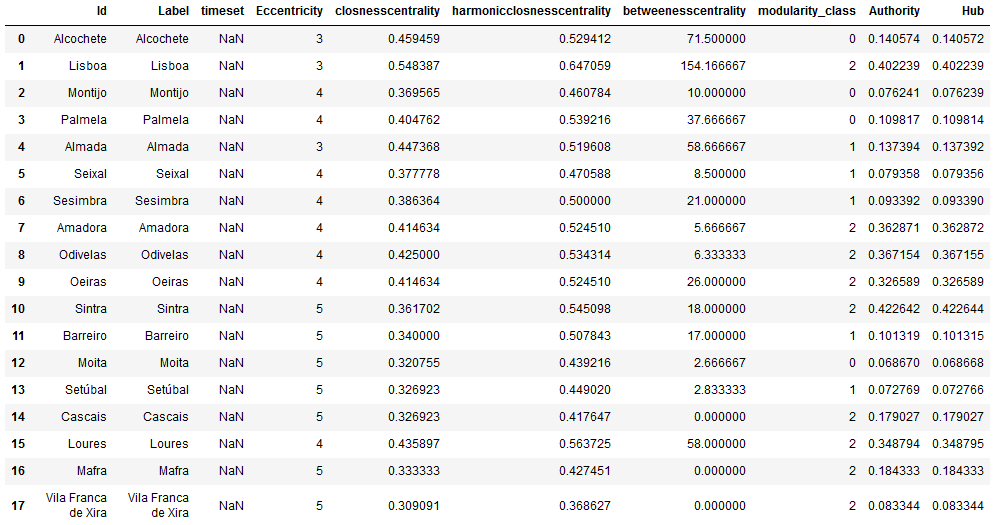

In [33]:
#nodes=pd.read_csv('nodes_lisboa.csv')

In [34]:
#nodes

In [35]:
# We are interested only in the Label and harmonic-closness-centrality columns
nodes = pd.DataFrame({'Label':['Alcochete', 'Lisboa', 'Montijo', 'Palmela', 'Almada', 'Seixal', 'Sesimbra', 'Amadora', 'Odivelas', 'Oeiras', 'Sintra', 'Barreiro', 'Moita', 'Setúbal', 'Cascais', 'Loures', 'Mafra', 'Vila Franca de Xira'],'harmonicclosnesscentrality':[0.529412, 0.647059, 0.460784, 0.539216, 0.519608, 0.470588, 0.5, 0.52451, 0.5343140000000001, 0.52451, 0.545098, 0.507843, 0.439216, 0.44902, 0.4176470000000001, 0.563725, 0.427451, 0.368627]})

In [36]:
nodes

,Label,harmonicclosnesscentrality
0,Alcochete,0.529412
1,Lisboa,0.647059
2,Montijo,0.460784
3,Palmela,0.539216
4,Almada,0.519608
5,Seixal,0.470588
6,Sesimbra,0.500000
7,Amadora,0.524510
8,Odivelas,0.534314
9,Oeiras,0.524510


In [37]:
# Creation of the complete graph which considers all the bus lines 
# Using the harmonic closeness centrality and the hubs values to modify the probability of the connections between the counties preferring more central and important nodes

nodes=nodes.sort_values(by=['Label'])
SUM=sum([np.exp(-i) for i in range(6)])
classifica=np.matrix(nodes.harmonicclosnesscentrality.values).T
Z=df.copy()
Z_edges=Z.stack().reset_index()
Z_edges=Z_edges[Z_edges[0]>0]
G = nx.DiGraph()
for i,(fr, to) in enumerate(zip(Z_edges.level_0,Z_edges.level_1)):
    G.add_edge(fr, to, weight=list(Z_edges[0])[i])
classifica2=np.matrix(pd.Series(nx.hits(G)[0]).sort_index().values).T
for j in range(100):
    Z=df.copy()
    for l in range(1,90):
        #Take a dataset copy and the series of 
        df_1=df.copy()
        X=TIM_bus[(TIM_bus['IDRoute'] == l)][['County_of_Origin','Average_Daily_SeniorPopulation_Travelling']].groupby(by=['County_of_Origin']).sum()
        X.index
        
        #Make it connected using the previously built function
        k,X=make_connect(df_1,X)
        
        #Get the counties not belonging to the selected bus route and set them to zero
        D=set(df.index).difference(set(X.index))
        df_1.loc[list(D)]=np.zeros((len(D),18))
        df_1[list(D)]=np.zeros((18,len(D)))
        
        #Get the values of the selected bus route and assign different weights based on the harmonic closeness ranking
        df_1=df_1*((classifica/max(classifica))*0.7+(classifica2/max(classifica2))*0.3)
        
        #Normalize on the column sum and fill the nan with 0
        df_1=df_1/df_1.sum()
        df_1=df_1.fillna(0)
        
        #Find the density for the county and add loops 
        X=pd.concat([X,pd.DataFrame(np.zeros((len(D),1)),index=D,columns=['Average_Daily_SeniorPopulation_Travelling'])])
        X=X.sort_index()
        S=set(X.index).difference(set(df_1.index))
        
        #Iterate the matrix matrix construction procedure 
        for i in S:
            X=X.drop(index=i)
        x=X.values
        for j in k:
            df_1.loc[j,j]=0
        M=df_1.values
        vector=x
        for i in range(1,6):
            x=np.dot(M,x)
            vector=vector+x*(np.exp(-i))
        H=pd.DataFrame(M*(vector/SUM),index=df.index,columns=df.columns)
        Z=Z.add(H, fill_value=0)

    Z_edges=Z.stack().reset_index()
    Z_edges=Z_edges[Z_edges[0]>0]
    G = nx.DiGraph()
    for i,(fr, to) in enumerate(zip(Z_edges.level_0,Z_edges.level_1)):
        G.add_edge(fr, to, weight=list(Z_edges[0])[i])
    classifica2=np.matrix(pd.Series(nx.hits(G)[0]).sort_index().values).T
Z

,Alcochete,Almada,Amadora,Barreiro,Cascais,Lisboa,Loures,Mafra,Moita,Montijo,Odivelas,Oeiras,Palmela,Seixal,Sesimbra,Setúbal,Sintra,Vila Franca de Xira
Alcochete,1.723055e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,6.398498e+04,0.000000e+00,0.000000,0.0,46891.803966,0.000000e+00,0.000000e+00,146548.551762,0.000000,0.000000,0.000000,0.000000,0.000000
Almada,0.000000e+00,1.138566e+05,0.000000e+00,0.000000,0.000000,8.058226e+04,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,191596.015404,57367.332018,0.000000,0.000000,0.000000
Amadora,0.000000e+00,0.000000e+00,1.977011e+05,0.000000,0.000000,1.506982e+05,0.000000e+00,0.000000,0.0,0.000000,1.927847e+05,2.074297e+05,0.000000,0.000000,0.000000,0.000000,175666.723536,0.000000
Barreiro,0.000000e+00,0.000000e+00,0.000000e+00,375133.249818,0.000000,0.000000e+00,0.000000e+00,0.000000,1.0,0.000000,0.000000e+00,0.000000e+00,301265.735606,353354.731285,113185.186628,108943.019063,0.000000,0.000000
Cascais,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,121286.327099,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000e+00,6.197076e+04,0.000000,0.000000,0.000000,0.000000,52825.934103,0.000000
Lisboa,3.809710e+06,4.437667e+06,2.918204e+06,0.000000,0.000000,2.263245e+06,2.755008e+06,0.000000,0.0,0.000000,2.933354e+06,3.137212e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Loures,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.715015e+05,1.488923e+05,404215.537333,0.0,0.000000,2.225920e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,196804.373750,741769.235872
Mafra,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,2.368413e+04,52098.875516,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,22181.518303,0.000000
Moita,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.0,1.000000,0.000000e+00,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Montijo,1.913095e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.0,30666.886205,0.000000e+00,0.000000e+00,22626.331797,0.000000,0.000000,0.000000,0.000000,0.000000


In [38]:
#Check which places have higher in_degree
pd.Series(dict(G.in_degree(weight='weight'))).sort_values(ascending=False)

Almada                 4.770104e+06
Amadora                4.339117e+06
Oeiras                 4.222577e+06
Odivelas               4.086390e+06
Alcochete              4.014933e+06
Loures                 3.778138e+06
Lisboa                 3.482626e+06
Cascais                1.603815e+06
Sintra                 1.555097e+06
Vila Franca de Xira    1.333136e+06
Mafra                  9.070003e+05
Barreiro               8.636917e+05
Seixal                 8.188889e+05
Palmela                6.834103e+05
Sesimbra               2.714471e+05
Setúbal                1.952314e+05
Montijo                1.618558e+05
Moita                  4.000000e+00
dtype: float64

In [39]:
#Check which places have higher out_degree
pd.Series(dict(G.out_degree(weight='weight'))).sort_values(ascending=False)

Lisboa                 2.225440e+07
Oeiras                 2.850902e+06
Sintra                 2.256668e+06
Odivelas               2.147250e+06
Loures                 1.885775e+06
Barreiro               1.251883e+06
Amadora                9.242805e+05
Vila Franca de Xira    7.573822e+05
Seixal                 7.427698e+05
Palmela                7.273218e+05
Almada                 4.434022e+05
Alcochete              2.746559e+05
Cascais                2.360830e+05
Sesimbra               1.108054e+05
Mafra                  9.796452e+04
Montijo                7.242517e+04
Setúbal                5.349006e+04
Moita                  4.000000e+00
dtype: float64

In [40]:
#Delete Moita, since it's not connected
Z_edges=Z.stack().reset_index()
Z_edges=Z_edges[Z_edges[0]>0]
Z_edges=Z_edges[(Z_edges.level_0!='Moita')]
Z_edges=Z_edges[(Z_edges.level_1!='Moita')]

In [41]:
#Check the hub score for each county
from networkx.algorithms.link_analysis.pagerank_alg import pagerank_numpy
G = nx.DiGraph()
for i,(fr, to) in enumerate(zip(Z_edges.level_0,Z_edges.level_1)):
  G.add_weighted_edges_from([(fr, to, list(Z_edges[0])[i])])
print(pd.Series(nx.hits(G)[0]).sort_values(ascending=False))

Lisboa                 0.793785
Odivelas               0.052057
Oeiras                 0.044661
Sintra                 0.034364
Amadora                0.023284
Loures                 0.016140
Seixal                 0.009261
Almada                 0.007371
Palmela                0.006858
Vila Franca de Xira    0.005057
Alcochete              0.002278
Cascais                0.002239
Sesimbra               0.001086
Montijo                0.000776
Mafra                  0.000737
Barreiro               0.000045
Setúbal                0.000001
dtype: float64


In [42]:
Z_edges.columns=['Source', 'Target', 'Weight']

###### Graph built using Gephi
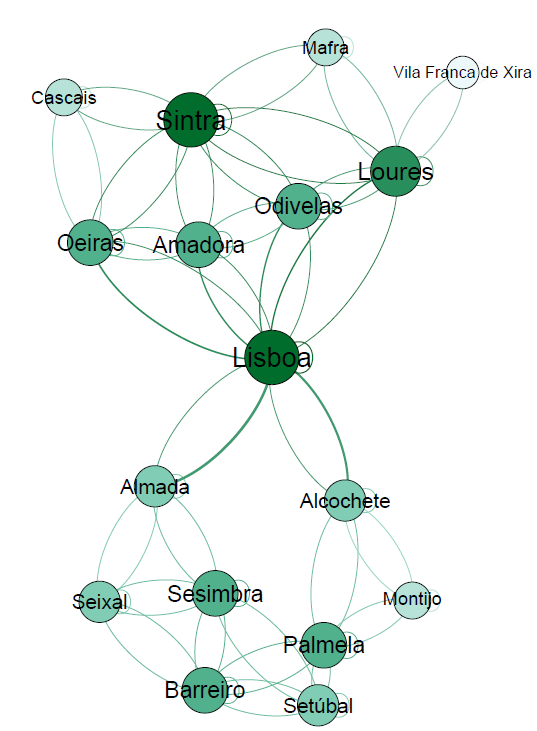

#### Building a graph that describes the ideal mobility (not only bus) for the senior population

We assigned weights to the edges as follows: the weight of the edge *i->j* is equal to the population density of county *i* divided by the degree of the node *i*

In [43]:
# density population by county
# Reference: Wikipedia

county_density = {'Alcochete': 140,
                     'Lisboa': 6452,
                     'Montijo': 150,
                     'Palmela': 140,
                     'Almada': 2500,
                     'Seixal': 1900,
                     'Sesimbra': 250,
                     'Amadora': 7400,
                     'Odivelas': 5400,
                     'Oeiras': 3800,
                     'Sintra': 1200,
                     'Barreiro': 2200,
                     'Moita': 1200,
                     'Setúbal': 510,
                     'Cascais': 2100,
                     'Loures': 1200,
                     'Mafra': 260,
                     'Vila Franca de Xira': 430}

In [44]:
G = geo_graph.copy()
for c in county_density.keys():
    for c_ in list(G[c].keys()):
        G[c][c_]['Weight']=county_density[c]/len(G[c])
        
d = {(x,y):county_density[x]/(len(G[x])-1) for x in county_density.keys() for y in list(set(G[x].keys()).difference({x}))}
edges = pd.DataFrame({'Source':[k[0] for k in list(d.keys())],'Target':[k[1] for k in list(d.keys())],'Weight':d.values()})
G=nx.from_pandas_edgelist(edges, 'Source', 'Target', ['Weight'])

In [45]:
# type(county_NseniorLisboa)==dict :  number of the senior people travelling per county (bus or not bus)
county_NseniorLisboa = dict(TIM[TIM['Region_of_Origin'] == 'R1 - AM Lisboa'].groupby('County_of_Origin')['Average_Daily_SeniorPopulation_Travelling'].sum())
senior_county=pd.Series(county_NseniorLisboa)

tot=sum(county_NseniorLisboa.values())
perc_senior_county=senior_county/tot

In [46]:
perc=pd.concat([perc_senior_county, pd.Series(nx.degree_centrality(G))], axis=1)
perc.columns=['perc_senior_county', 'degree_centrality']

print(perc)

                     perc_senior_county  degree_centrality
Alcochete                      0.000349           0.176471
Almada                         0.001652           0.176471
Amadora                        0.013444           0.235294
Barreiro                       0.077402           0.294118
Cascais                        0.057605           0.117647
Lisboa                         0.174082           0.352941
Loures                         0.006973           0.294118
Mafra                          0.018070           0.117647
Moita                          0.000022           0.176471
Montijo                        0.028869           0.176471
Odivelas                       0.113351           0.235294
Oeiras                         0.136455           0.235294
Palmela                        0.089081           0.294118
Seixal                         0.041527           0.176471
Sesimbra                       0.009088           0.235294
Setúbal                        0.013904           0.1764

For each edge, we assigned a 'need-rate' using the degree centrality and the percentage of senior travellers per county 

In [47]:
edge_w_c = dict()
for c in LISB_COUNTY.keys():
    mis = []
    for conf in LISB_COUNTY[c]:
        mis.append(perc.loc[conf,'degree_centrality'])
    mis_ = {conf: perc.loc[conf,'degree_centrality']/sum(mis) for conf in LISB_COUNTY[c]}
    edge_weight_c = {(c, conf): mis_[conf]*perc.loc[c,'perc_senior_county'] for conf in LISB_COUNTY[c]}
    edge_w_c[c] = edge_weight_c
    
edge_w={}
for k in edge_w_c.keys():
    edge_w.update(edge_w_c[k])

In [48]:
#edge_w

We want an undirected graph, so we averaged the weight *(i,j)* and *(j,i)* for all *i* and *j*

In [49]:
und_graph = {k: np.mean([edge_w[k],edge_w[(k[1],k[0])]]) for k in edge_w.keys()}

In [50]:
# Build the adjacence matrix
M = np.zeros((len(LISB_COUNTY),len(LISB_COUNTY)))
df = pd.DataFrame(M,columns=LISB_COUNTY.keys(), index=LISB_COUNTY.keys())
for i,j in list(und_graph.keys()):
    df.loc[i,j]=und_graph[(i,j)]

In [51]:
df

,Cascais,Oeiras,Lisboa,Amadora,Sintra,Odivelas,Loures,Mafra,Vila Franca de Xira,Almada,Seixal,Barreiro,Sesimbra,Setúbal,Moita,Palmela,Alcochete,Montijo
Cascais,0.009601,0.015803,0.000000,0.000000,0.018008,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Oeiras,0.015803,0.024810,0.030613,0.013525,0.025821,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Lisboa,0.000000,0.030613,0.036017,0.013686,0.000000,0.025608,0.015879,0.000000,0.000000,0.009314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009066,0.000000
Amadora,0.000000,0.013525,0.013686,0.002241,0.008894,0.010188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sintra,0.018008,0.025821,0.000000,0.008894,0.021641,0.020816,0.009889,0.007777,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Odivelas,0.000000,0.000000,0.025608,0.010188,0.020816,0.018136,0.011916,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Loures,0.000000,0.000000,0.015879,0.000000,0.009889,0.011916,0.001453,0.003765,0.050456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mafra,0.000000,0.000000,0.000000,0.000000,0.007777,0.000000,0.003765,0.002780,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Vila Franca de Xira,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050456,0.000000,0.020124,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Almada,0.000000,0.000000,0.009314,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000310,0.004308,0.000000,0.000964,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
upper_adj=pd.DataFrame(np.triu(np.array(df))*2-np.diag(np.diag(np.array(df))),columns=LISB_COUNTY.keys(), index=LISB_COUNTY.keys())
graph=upper_adj.stack().reset_index()
graph=graph[graph[0]!=0]
graph.columns=['Source', 'Target', 'Weight']

In [53]:
graph['Weight'].sum()

1.0

In [54]:
graph.index = range(len(graph))

For each edge, the weight represents the 'need-rate' of public transportation between the two counties or in one county

In [55]:
print(graph)

                 Source               Target    Weight
0               Cascais              Cascais  0.009601
1               Cascais               Oeiras  0.031607
2               Cascais               Sintra  0.036016
3                Oeiras               Oeiras  0.024810
4                Oeiras               Lisboa  0.061226
5                Oeiras              Amadora  0.027051
6                Oeiras               Sintra  0.051642
7                Lisboa               Lisboa  0.036017
8                Lisboa              Amadora  0.027372
9                Lisboa             Odivelas  0.051215
10               Lisboa               Loures  0.031757
11               Lisboa               Almada  0.018628
12               Lisboa            Alcochete  0.018132
13              Amadora              Amadora  0.002241
14              Amadora               Sintra  0.017788
15              Amadora             Odivelas  0.020377
16               Sintra               Sintra  0.021641
17        

In [56]:
#graph.to_csv('GRAPH.csv', index = False) # usefull for Gephi

###### Graph built using Gephi
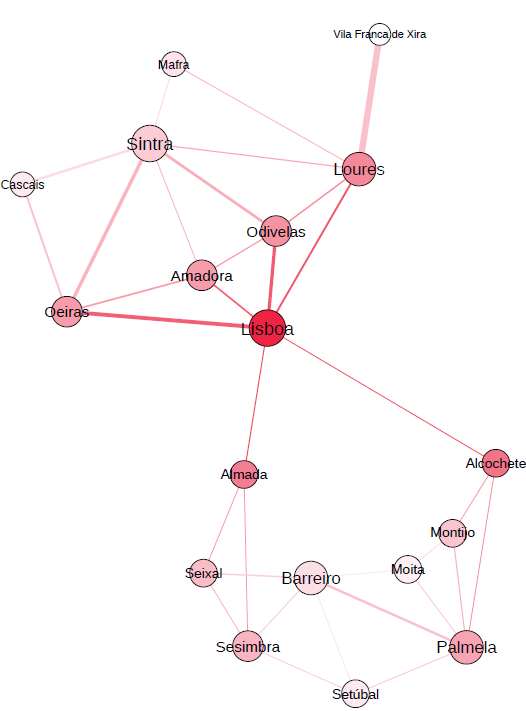

#### Comparing the two graphs

In [57]:
graph_1 = Z_edges
graph_1.index = range(len(graph_1))

In [58]:
graph_1['Weight'] = graph_1['Weight']/graph_1['Weight'].sum()

In [59]:
compare = dict()
y_1, y_2 = 0, 0
for i in range(len(graph)):
    x = graph.iloc[i,2]
    if not graph_1[(graph_1.Source==graph.iloc[i,0]) & (graph_1.Target==graph.iloc[i,1])]['Weight'].empty:
        y_1 = graph_1[(graph_1.Source==graph.iloc[i,0]) & (graph_1.Target==graph.iloc[i,1])]['Weight'].values[0]
    if not graph_1[(graph_1.Target==graph.iloc[i,0]) & (graph_1.Source==graph.iloc[i,1])]['Weight'].empty:
        y_2 = graph_1[(graph_1.Target==graph.iloc[i,0]) & (graph_1.Source==graph.iloc[i,1])]['Weight'].values[0]
    if y_1 and y_2:
        compare[(graph.iloc[i,0],graph.iloc[i,1])]=np.mean([y_1,y_2])/x
        y_1,y_2=0,0
    if y_1:
        compare[(graph.iloc[i,0],graph.iloc[i,1])]=y_1/x
        y_1=0
    if y_2:
        compare[(graph.iloc[i,0],graph.iloc[i,1])]=y_2/x
        y_2=0       

If compare[(County1, County_2)] < 1 the mobility between the two Counties could be enhanced.
<br>Otherwise, the mobility is already good.

The right trade-off is when all the values are set to 1.

In [60]:
compare

{('Cascais', 'Cascais'): 0.3406268243529893,
 ('Cascais', 'Oeiras'): 0.4406328914365069,
 ('Cascais', 'Sintra'): 0.21123223015587098,
 ('Oeiras', 'Oeiras'): 0.5809421186162892,
 ('Oeiras', 'Lisboa'): 0.7757430885378626,
 ('Oeiras', 'Amadora'): 0.35245163466177576,
 ('Oeiras', 'Sintra'): 0.19349247873121897,
 ('Lisboa', 'Lisboa'): 1.6943315135780257,
 ('Lisboa', 'Amadora'): 1.5115295814285659,
 ('Lisboa', 'Odivelas'): 0.868720497066984,
 ('Lisboa', 'Loures'): 1.2423655489574688,
 ('Lisboa', 'Almada'): 3.2700045289250435,
 ('Lisboa', 'Alcochete'): 2.880274910851097,
 ('Amadora', 'Amadora'): 2.379112072242121,
 ('Amadora', 'Sintra'): 0.3334721119182129,
 ('Amadora', 'Odivelas'): 0.43132078740866114,
 ('Sintra', 'Sintra'): 0.29777984644880945,
 ('Sintra', 'Odivelas'): 0.21699439190532321,
 ('Sintra', 'Loures'): 0.3035885942071956,
 ('Sintra', 'Mafra'): 0.4098820607072114,
 ('Odivelas', 'Odivelas'): 0.7083315566624612,
 ('Odivelas', 'Loures'): 0.37255104508576536,
 ('Loures', 'Loures'): 2.7

## Conclusions

### Scalability and Impact
Our main interests in developing a solution for the senior citizens' transportation system were the applicability and easy usability of the solution. 
We have located which are the crucial points of the bus transportation system in the district of Lisbon, and links between them, for the elderly. Our results can be used, in a short time, to remodel and optimize the preexisting bus routes or to empower the current ones, whether there is or not money to invest in public transport, to favor elders mobility.
Moreover, the simple framework and the capacity to deal with a low quantity of data permits this work to be scalable to the entire nation and replicable in every city.
A possible limitation is that we were unable to exactly design the new bus routes, due to the lack of data. By doing so, we would have been able to construct some specific routes for the elderly.

### Future Work
There are a lot of data that would have made this work better, for sure some geographic insight about the distribution of the counties would help us to make a 
better network and to better understand the route of every bus line, also to make more efficient the bus lines.
Another kind of data which would have been convenient is the frequency of the buses, without it we had no a precise idea of how much importance to give to every bus;
finally, since there were a lot of link addresses belonging to senior people without a reference to buses, we would have data relative to the other means of communication used by seniors.